## EDA on segment_text

In [1]:
import os
os.getcwd()

'c:\\Users\\Tristan\\Desktop\\Capstone ML and Data privacy\\capstone-repo\\code\\data_restructuring'

In [4]:
import pandas as pd
import sklearn
import seaborn as sns

PATH = r"../../dataset/concat_segment_text.csv"


In [6]:
df = pd.read_csv(PATH)
df.head()

,segment_text,practice,modality
0,PRIVACY POLICY This privacy policy (hereafter ...,NaN,NaN
1,1. ABOUT OUR PRODUCTS 1.1 Our products offer a...,NaN,NaN
2,2. THE INFORMATION WE COLLECT The information ...,Identifier_Cookie_or_similar_Tech_1stParty,PERFORMED
3,2. THE INFORMATION WE COLLECT The information ...,Identifier_IP_Address_1stParty,PERFORMED
4,"2.2 In addition, we store certain information ...",Identifier_Cookie_or_similar_Tech_1stParty,PERFORMED


In [38]:
# Number of records
print(len(df))

21623


In [41]:
df["practice"].isna().sum()

11422

### Counts per each practice
Taking into account that one segment can have multiple labels

In [8]:
# Counts of each practice
df_by_practice = df["practice"].value_counts(sort = True).rename_axis('practice').reset_index(name = "counts")
df_by_practice

,practice,counts
0,Contact_E_Mail_Address_1stParty,1105
1,Identifier_Cookie_or_similar_Tech_1stParty,858
2,Location_1stParty,821
3,Identifier_IP_Address_1stParty,590
4,Contact_Phone_Number_1stParty,565
5,Identifier_Cookie_or_similar_Tech_3rdParty,524
6,Identifier_Device_ID_1stParty,446
7,Contact_Postal_Address_1stParty,364
8,SSO,274
9,Demographic_Age_1stParty,259


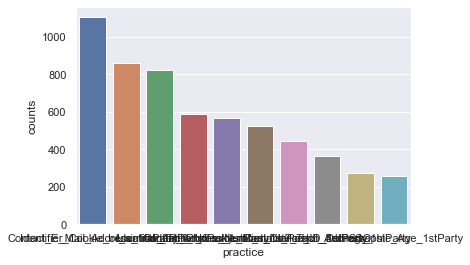

In [9]:
sns.set(rc = {'figure.figsize':(30,15)})
ax = sns.barplot(x = "practice", y = "counts", data = df_by_practice[:10])

<AxesSubplot:xlabel='practice', ylabel='counts'>

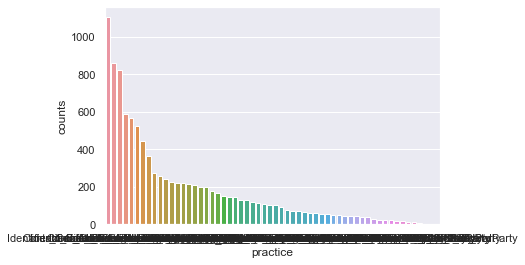

In [10]:
sns.barplot(x = "practice", y = "counts", data = df_by_practice[:])

### segment length statistics: by word, correlations between length and practice?

In [11]:
# Duplicate df
df_segment_statistics = df

import re

In [12]:
df_segment_statistics["segment_length"] = df_segment_statistics["segment_text"].apply(lambda sen: len(re.findall(r'\w+', sen)))

In [13]:
df_segment_statistics["segment_length"].describe()

count    21623.000000
mean        74.226426
std         95.881617
min          0.000000
25%         30.000000
50%         57.000000
75%         96.000000
max       2863.000000
Name: segment_length, dtype: float64

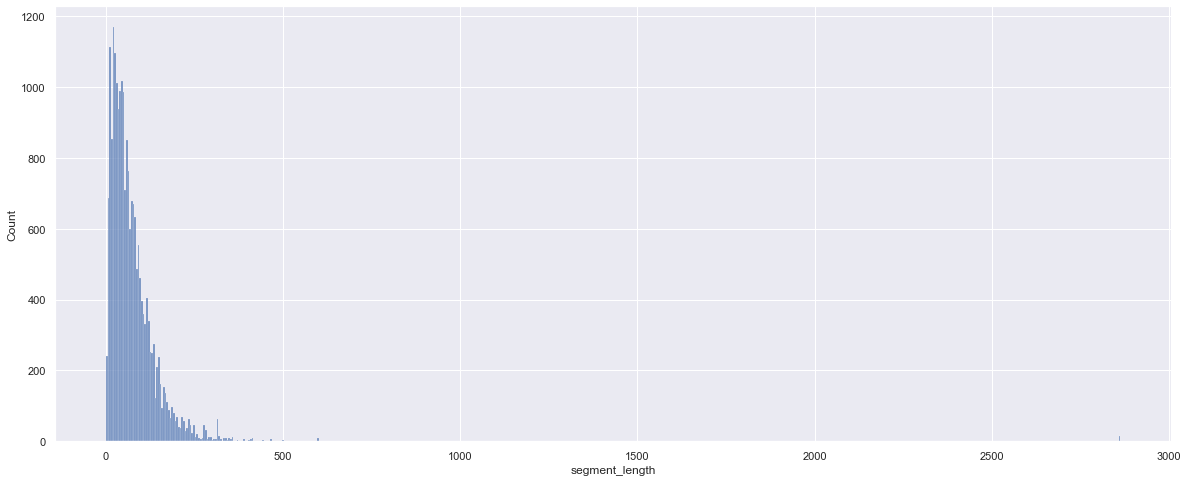

In [14]:
# Histogram of segment length
sns.set(rc = {'figure.figsize':(20,8)})
ax = sns.histplot(x = "segment_length",  data = df_segment_statistics)

In [15]:
## Average segment length by type of practice
df_segment_statistics.groupby(["practice"]).mean().sort_values(by = "segment_length", ascending=False).head()

,segment_length
practice,
Contact_Address_Book_3rdParty,296.928571
Demographic_3rdParty,146.847222
Demographic_Gender_3rdParty,142.916667
Identifier_Mobile_Carrier_1stParty,142.020000
Identifier_Mobile_Carrier_3rdParty,142.000000


In [16]:
# Median segment length by practice
df_segment_statistics.groupby(["practice"]).median().sort_values(by = "segment_length", ascending=False).head()

,segment_length
practice,
Identifier_Mobile_Carrier_3rdParty,130.0
Demographic_Gender_3rdParty,120.0
Location_Cell_Tower_3rdParty,106.0
Identifier_SSID_BSSID_3rdParty,105.5
Contact_City_3rdParty,104.0


In [17]:
# Concat to df_by_practice
df_by_practice = pd.merge(left = df_by_practice, right = df_segment_statistics.groupby(["practice"]).mean(), how = "outer", left_on = "practice", right_on = "practice", suffixes = (None, "_mean"))

In [18]:
df_by_practice = pd.merge(left = df_by_practice, right = df_segment_statistics.groupby(["practice"]).median(), how = "outer", left_on = "practice", right_on = "practice", suffixes = (None, "_median"))

In [19]:
# Sanity check
df_by_practice.head()

,practice,counts,segment_length,segment_length_median
0,Contact_E_Mail_Address_1stParty,1105,84.118552,72.0
1,Identifier_Cookie_or_similar_Tech_1stParty,858,81.913753,68.5
2,Location_1stParty,821,89.794153,70.0
3,Identifier_IP_Address_1stParty,590,96.984746,73.0
4,Contact_Phone_Number_1stParty,565,90.371681,67.0


In [20]:
df_by_practice.rename(columns = {"segment_length":"segment_length_mean"}, inplace=True)
df_by_practice.head()

,practice,counts,segment_length_mean,segment_length_median
0,Contact_E_Mail_Address_1stParty,1105,84.118552,72.0
1,Identifier_Cookie_or_similar_Tech_1stParty,858,81.913753,68.5
2,Location_1stParty,821,89.794153,70.0
3,Identifier_IP_Address_1stParty,590,96.984746,73.0
4,Contact_Phone_Number_1stParty,565,90.371681,67.0


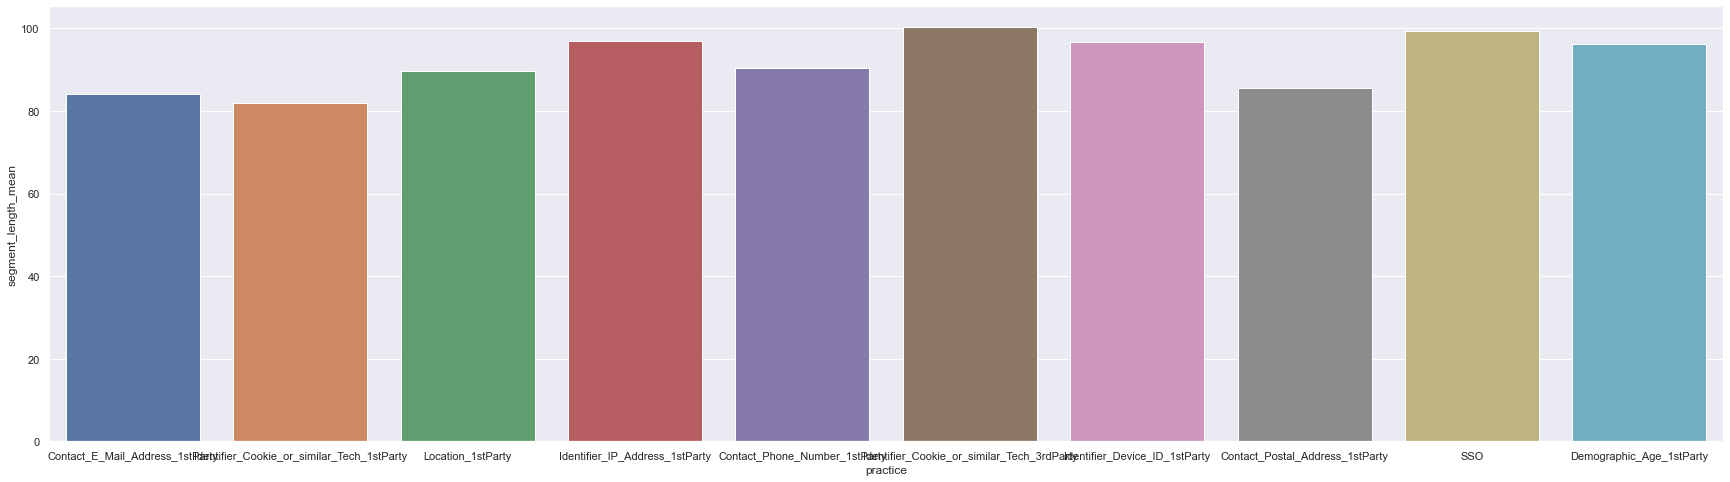

In [21]:
# Plotting top 10 segment statisitcs
sns.set(rc = {'figure.figsize':(30,8)})
ax = sns.barplot(x = "practice", y = "segment_length_mean",  data = df_by_practice[:10])

In [22]:
df_by_practice["segment_length_mean"][:10].describe()

count     10.000000
mean      92.148979
std        6.683275
min       81.913753
25%       86.647714
50%       93.286227
75%       96.914568
max      100.339695
Name: segment_length_mean, dtype: float64

Not much variation in segment length for the top 10 frequently recurring practices.

In [34]:
## Looking at propotion of counts per practice 
df_by_practice["counts_percentage"] = df_by_practice["counts"].apply(lambda count: (count / df_by_practice["counts"].sum()) * 100)
df_by_practice["counts_percentage"] = df_by_practice["counts_percentage"].round(2)

df_by_practice.head(10)

,practice,counts,segment_length_mean,segment_length_median,counts_percentage
0,Contact_E_Mail_Address_1stParty,1105,84.118552,72.0,10.83
1,Identifier_Cookie_or_similar_Tech_1stParty,858,81.913753,68.5,8.41
2,Location_1stParty,821,89.794153,70.0,8.05
3,Identifier_IP_Address_1stParty,590,96.984746,73.0,5.78
4,Contact_Phone_Number_1stParty,565,90.371681,67.0,5.54
5,Identifier_Cookie_or_similar_Tech_3rdParty,524,100.339695,86.5,5.14
6,Identifier_Device_ID_1stParty,446,96.704036,72.0,4.37
7,Contact_Postal_Address_1stParty,364,85.598901,69.5,3.57
8,SSO,274,99.463504,86.5,2.69
9,Demographic_Age_1stParty,259,96.200772,80.0,2.54


In [37]:
# with open(r"../../tex_files/my_table.tex", "w") as tf:
#     tf.write(df_by_practice.head(10).to_latex(index = False))

In [43]:
df_by_practice["counts_percentage"].head(10).sum()

56.92

In [35]:
# Summary statistics of top 10 by mean and median
df_top_10_summary = pd.concat([df_by_practice.head(10)["segment_length_mean"].describe(), df_by_practice.head(10)["segment_length_median"].describe()], axis = 1)

df_top_10_summary.head()

,segment_length_mean,segment_length_median
count,10.000000,10.000000
mean,92.148979,74.500000
std,6.683275,7.230337
min,81.913753,67.000000
25%,86.647714,69.625000


In [50]:
# with open(r"../../tex_files/my_table.tex", "w") as tf:
#     tf.write(df_top_10_summary.to_latex(index = True))

In [27]:
df_by_practice["counts_proportion"][:10].sum()

0.5691598862856582

Top 10 frequently recurring practices compose of 60% of all practices in the dataset.

### Looking at the practices with the fewest counts 

In [44]:
df_by_practice.tail(10)

,practice,counts,segment_length_mean,segment_length_median,counts_percentage
48,Identifier_IMEI_3rdParty,23,115.347826,93.0,0.23
49,Identifier_Mobile_Carrier_3rdParty,21,142.000000,130.0,0.21
50,Contact_Password_3rdParty,18,70.555556,65.0,0.18
51,Identifier_SSID_BSSID_1stParty,16,86.062500,71.0,0.16
52,Contact_Address_Book_3rdParty,14,296.928571,78.5,0.14
53,Identifier_IMSI_1stParty,11,92.363636,78.0,0.11
54,Contact_City_3rdParty,8,100.500000,104.0,0.08
55,Identifier_SIM_Serial_3rdParty,3,85.333333,65.0,0.03
56,Identifier_IMSI_3rdParty,3,62.333333,65.0,0.03
57,Identifier_SSID_BSSID_3rdParty,2,105.500000,105.5,0.02


In [46]:
df_by_practice.tail(10)["counts_percentage"].sum()

1.1900000000000002

In [49]:
with open(r"../../tex_files/my_table.tex", "w") as tf:
    tf.write(df_by_practice.tail(10).to_latex(index = False))

In [31]:
df_by_practice.tail(10).describe()

,counts,segment_length_mean,segment_length_median,counts_proportion
count,10.000000,10.000000,10.000000,10.000000
mean,11.900000,115.692476,85.500000,0.001167
std,7.723701,67.578606,21.997475,0.000757
min,2.000000,62.333333,65.000000,0.000196
25%,4.250000,85.515625,66.500000,0.000417
50%,12.500000,96.431818,78.250000,0.001225
75%,17.500000,112.885870,101.250000,0.001716
max,23.000000,296.928571,130.000000,0.002255


Much more variation with higher std: around 38 words vs 2.4 for the top 10 most frequently recurring.
But then could be because of low frequency. So might not be statisitcally significant.